In [489]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
import networkx as nx
import scipy.stats as stats
import math
#from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [490]:
globalNumber = 500
clusterNumber = 3
topKK = 5

# input cost vector to be visualzed
with open("../global_cost_vectors_500_lRand.pk",'rb') as f:
    global_cost = pickle.load(f)
with open("../global_trips_500_lRand.pk",'rb') as f:
    global_dict = pickle.load(f)
with open("trajectories_local_50_w98_near_cost.pk",'rb') as f:
    local_cost = pickle.load(f)
with open("trajectories_local_50_w98_near_route.pk",'rb') as f:
    local_route = pickle.load(f)


# Visualize with original data (2 factors : time and risk)

In [491]:
global_cost_list = []
time_list = []
risk_list = []

for k in global_cost:
    time_list.append(global_cost[k][0][0])
    risk_list.append(global_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
global_time_normalized = []
global_risk_normalized = []
for k in global_cost:
    temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    global_time_normalized.append((global_cost[k][0][0]-avgTime)/stdTime)
    global_risk_normalized.append((global_cost[k][0][1]-avgRisk)/stdRisk)
    global_cost_list.append(temp)
    


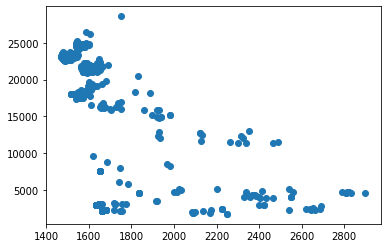

In [492]:
# orignal 
plt.scatter(time_list, risk_list)

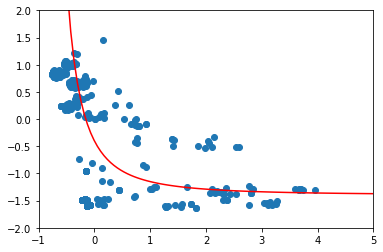

In [493]:
plt.scatter(global_time_normalized, global_risk_normalized)

# 100 linearly spaced numbers
x = np.linspace(-0.9,5,100)
# the function, which is y = x^2 here
y = 1/(x+1)**2 -1.4
#y = 1/(x+1.2)**2 -1.6
plt.ylim([-2, 2])
plt.xlim([-1, 5])
plt.plot(x,y, 'r')
plt.show()

In [494]:
def func(x,y):
    return 1/(x+1)**2 -1.4 -y
greenX = []
greenY = []
global_cost_list = []
greenLoop = [] # stores the loop number

blueX = []
blueY =[]
for i in range(len(global_time_normalized)):
    if func(global_time_normalized[i],global_risk_normalized[i]) >= 0:
        greenX.append(global_time_normalized[i])
        greenY.append(global_risk_normalized[i])
        global_cost_list.append((global_time_normalized[i],global_risk_normalized[i]))
        greenLoop.append(i+1)
    else:
        blueX.append(global_time_normalized[i])
        blueY.append(global_risk_normalized[i])
        

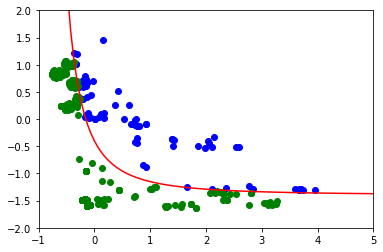

In [495]:
plt.scatter(blueX, blueY,c ='b')
plt.scatter(greenX, greenY,c ='g')

# 100 linearly spaced numbers
x = np.linspace(-0.9,5,100)
# the function, which is y = x^2 here
y = 1/(x+1)**2 -1.4
plt.ylim([-2, 2])
plt.xlim([-1, 5])
plt.plot(x,y, 'r')
plt.show()

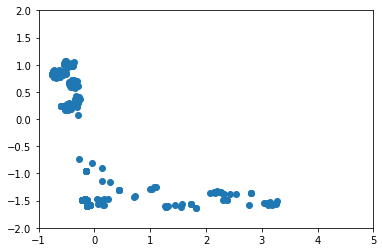

In [496]:
#plt.scatter(blueX, blueY,c ='b')
plt.scatter(greenX, greenY)


plt.ylim([-2, 2])
plt.xlim([-1, 5])
#plt.plot(x,y, 'r')
plt.show()

In [497]:
local_cost_list = []
time_list = []
risk_list = []

for k in local_cost:
    time_list.append(local_cost[k][0][0])
    risk_list.append(local_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
local_time_normalized = []
local_risk_normalized = []
for k in local_cost:
    #temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    local_time_normalized.append((local_cost[k][0][0]-avgTime)/stdTime)
    local_risk_normalized.append((local_cost[k][0][1]-avgRisk)/stdRisk)
    local_cost_list.append(temp)

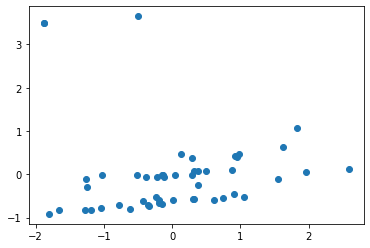

In [498]:
plt.scatter(local_time_normalized, local_risk_normalized)
plt.show()

# Visualize with ratio data (2 factors : time and risk)

In [499]:
global_ratio_list = []
ratio_list = []

for k in global_cost:
    ratio_list.append((global_cost[k][0][0]/global_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
global_Ratio_normalized = []
for e in ratio_list:
    global_ratio_list.append((e-avgRatio)/stdRatio)
    

(array([  0.,   0.,   0.,   0.,   0., 314.,  24.,  21.,   2.,   0.,   9.,
          3.,  70.,  13.,   0.,  20.,   3.,   4.,   3.,   7.,   2.,   3.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
         2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,
         4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,
         7.  ]),
 <BarContainer object of 36 artists>)

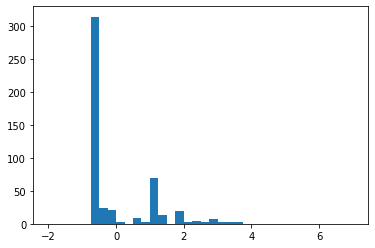

In [500]:
bins = [-2]
for i in range(36):
    bins.append(bins[-1]+0.25)
    
#temp = [global_ratio_list[i] for i in range(500) if kmeans.labels_[i]==0]
    
plt.hist(global_ratio_list,bins=bins)

In [501]:
local_ratio_list = []
ratio_list = []

for k in local_cost:
    ratio_list.append((local_cost[k][0][0]/local_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
local_Ratio_normalized = []
for e in ratio_list:
    local_ratio_list.append((e-avgRatio)/stdRatio)

(array([ 2.,  4.,  4., 12.,  1.,  3.,  0.,  2.,  8., 10.,  1.,  0.,  0.,
         0.]),
 array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25]),
 <BarContainer object of 14 artists>)

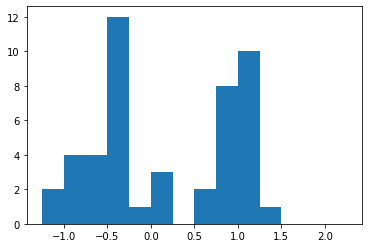

In [502]:
bins = [-1.25]
for i in range(14):
    bins.append(bins[-1]+0.25)
    
plt.hist(local_ratio_list,bins=bins)

# K means clustering based on the original features

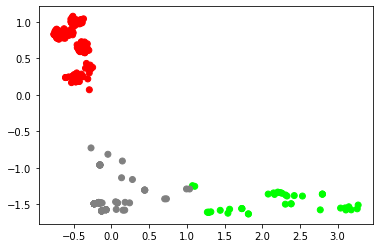

In [503]:
kmeans = KMeans(
    init="random",
    n_clusters=clusterNumber,
    n_init=10,
    max_iter=300,
    random_state=10
)

kmeans.fit(global_cost_list)
color_labels = kmeans.labels_

# self defined colors and plot

color = [(0.5,0.5,0.5),(1,0,0),(0,1,0),(0,0,1),(0,0,0)]
color_list = []
for ind in range(len(greenX)):
    color_list.append(color[color_labels[ind]])
    
plt.scatter(greenX, greenY,c=color_list)

# PageRank Implementation

In [504]:
idToRoad =  []
with open("../../turning_network_linkID_updated.csv",'r') as f:
    idToRoad = csv.reader(f)
    idToRoad = list(idToRoad)
    
idToRoadDict = {}
roadToIdDict ={}
for element in idToRoad:
    idToRoadDict[element[0]] = (element[1],element[2])
    if "intersection" not in element[0]:
        roadToIdDict[element[1].split('_')[0],element[2].split('_')[0]] = element[0]
#
#print(roadToIdDict)    

In [505]:
# 8/3
global_trip_grouped = {}
for i in range(clusterNumber):
    global_trip_grouped[i] = []
    
for i in range(len(greenLoop)):
    key = "l" + str(greenLoop[i])
    global_trip_grouped[color_labels[i]].append(global_dict[key])


In [506]:
def pageRank(trips, origin = '1666494', destination = '1662728'): # input a bunch of trips, return a recommendation for route
    dualArcs = {} # store the arcs for dual graph
    originalG = nx.DiGraph()
    #print(len(trips))
    for t in trips:
        subG = nx.DiGraph()
        arcList = []
        for road in t:
            startNode = idToRoadDict[str(road)][0].split('_')[0]
            endNode = idToRoadDict[str(road)][1].split('_')[0]
            arcList.append((startNode,endNode))
        subG.add_edges_from(arcList)
        
        # find the path to be added to construct dual graph
        path = nx.shortest_path(subG, origin, destination)
        
        for ind in range(len(path)-2):
            #print((path[ind],path[ind + 1]))
            originalG.add_edges_from([(path[ind],path[ind + 1])])
            current_arc = path[ind]+'_to_'+path[ind + 1]
            next_arc = path[ind + 1]+'_to_'+path[ind + 2]
            if ind == 0:
                if not (path[0] in dualArcs):
                    dualArcs[path[0]] = {current_arc : 1}
                else:
                    if not(current_arc in dualArcs[path[0]]):
                        dualArcs[path[0]][current_arc] = 1
                    else:
                        dualArcs[path[0]][current_arc] += 1
            
            if not (current_arc in dualArcs):
                dualArcs[current_arc] = {next_arc : 1}
            else:
                if not (next_arc in dualArcs[current_arc]):
                    dualArcs[current_arc][next_arc] = 1
                else:
                    dualArcs[current_arc][next_arc] += 1

        last_arc = path[-2]+'_to_'+path[-1]
        originalG.add_edges_from([(path[-2],path[-1])])
        if not (last_arc in dualArcs):
                dualArcs[last_arc] = {path[-1] : 1}
        else:
            if not (path[-1] in dualArcs[last_arc]):
                dualArcs[last_arc][path[-1]] = 1
            else:
                dualArcs[last_arc][path[-1]] += 1
                
    for key in dualArcs:
        sumCount = 0
        for key2 in dualArcs[key]:
            sumCount += dualArcs[key][key2]
            
        for key2 in dualArcs[key]:
            dualArcs[key][key2] /= sumCount
        
    dualG = nx.DiGraph()
    
    dualArcList = []
    for key in dualArcs:
        for key2 in dualArcs[key]:
            dualArcList.append((key,key2,{'weight':dualArcs[key][key2]}))
            
    dualG.add_edges_from(dualArcList)
    dualG.add_edges_from([(destination,origin,{'weight':1})])
    #record pageRank result
    result = nx.pagerank(dualG, weight='weight', alpha=0.9)
    
    weightNode = {}
    for k in result:
        if '_to_' in k:
            startNode = k.split('_to_')[0]
            endNode = k.split('_to_')[1]
            #print(startNode,endNode)
            originalG[startNode][endNode]['weight'] = np.log(1/result[k])
            weightNode[(startNode,endNode)] = np.log(1/result[k])
    def returnWeight(start,end,weight):
        
        return weight['weight']
            
    optimalPath = nx.shortest_path(originalG,source=origin,target=destination,weight=returnWeight)
    print(originalG['1666494'])
    return optimalPath
        
        
        

In [507]:
group_optimal_path = []
for g in range(clusterNumber):
    group_optimal_path.append(pageRank(global_trip_grouped[g]))

{'1666490': {'weight': 4.827166646131085}, '1666498': {'weight': 5.421657236287303}}
{'1666490': {'weight': 5.756170126915875}, '1666498': {'weight': 4.5400560734865465}}
{'1666490': {'weight': 4.577895265496707}}


In [508]:
# used to save the recommended path
# with open("group_5_optimal_path_L_filtered_2.pk", 'wb') as f:
#     pickle.dump(group_optimal_path,f)

# construct the preference ratio distribution of the groups

In [509]:
ratioDict = {}
for g in range(clusterNumber):
    ratioDict[g] = []
    
for idx in range(len(greenLoop)):
    k = 'l' + str(greenLoop[idx])
    ratioDict[kmeans.labels_[idx]].append(global_cost[k][0][0]/global_cost[k][0][1]) 
    #ratioDict[kmeans.labels_[idx]].append(global_cost[k][0][1]/global_cost[k][0][2]) 
    #ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][1]/global_cost[k][0][0])



In [510]:
greenLoop

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 40,
 43,
 44,
 45,
 50,
 57,
 59,
 60,
 65,
 67,
 69,
 71,
 72,
 74,
 78,
 89,
 90,
 92,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 190,
 191,
 192,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 212,
 213,
 214,
 215,
 216,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 23

In [511]:
normalDistribution = {}

for g in range(clusterNumber):
    normalDistribution[g] =  {'mean': np.mean(ratioDict[g]) , 'std':np.std(ratioDict[g]) }

In [512]:
normalDistribution

{0: {'mean': 0.5330672416066063, 'std': 0.15467738788153143},
 1: {'mean': 0.06931628875181668, 'std': 0.0081521765104537},
 2: {'mean': 0.836774487228063, 'std': 0.24961409029185286}}

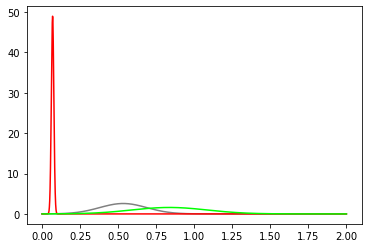

In [513]:
x_axis = np.arange(0, 2, 0.0001)

for g in range(clusterNumber):
    #if g == 0 :
    #    continue
    plt.plot(x_axis, stats.norm.pdf(x_axis, normalDistribution[g]['mean'], normalDistribution[g]['std']),c=color[g])
plt.show()

# construct the preference ratio distribution for the user

In [514]:
ratioLocal = []
    
for idx in range(1,51):
    k = 'l'+str(idx)
    ratioLocal.append(local_cost[k][0][0]/local_cost[k][0][1])
    #ratioLocal.append(local_cost[k][0][1]/local_cost[k][0][2])

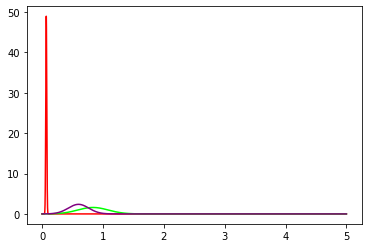

In [515]:
x_axis = np.arange(0, 5, 0.0001)

for g in range(clusterNumber):
    if g ==0 :
        continue
    plt.plot(x_axis, stats.norm.pdf(x_axis, normalDistribution[g]['mean'], normalDistribution[g]['std']),c=color[g])

plt.plot(x_axis, stats.norm.pdf(x_axis,np.mean(ratioLocal),np.std(ratioLocal)),c='purple')
    
plt.show()

# Calculate KL-divergence

In [516]:
def KLDivergence(mean1,std1,mean2,std2):
    
    return np.log(std2/std1) + (std1**2 + (mean1-mean2)**2)/(2*std2**2) - 1/2

In [517]:
for g in range(clusterNumber):
    print('KL(group{},user) : {}'.format(g, KLDivergence(np.mean(ratioLocal),
                                                         np.std(ratioLocal), 
                                                         normalDistribution[g]['mean'], 
                                                         normalDistribution[g]['std'])
                                        ))
    

KL(group0,user) : 0.09885586905991406
KL(group1,user) : 2321.87877177804
KL(group2,user) : 0.5748592341196155


In [518]:
greenX

[1.5449238059570898,
 1.816588170434712,
 1.816588170434712,
 1.2721350372048434,
 1.2883327099220208,
 1.2883327099220208,
 1.2883327099220208,
 1.3185880629168156,
 3.1813351841128434,
 2.7702628484364076,
 3.2605609021593227,
 3.1098913492266536,
 3.0997039828856146,
 3.1492939556547186,
 3.039515130418104,
 3.272847358338271,
 1.5675903368853168,
 1.4430992884027527,
 1.7298641662135361,
 1.7298641662135361,
 2.307018666494988,
 2.3835661430068007,
 2.3835661430068007,
 1.7298641662135361,
 2.227283827045405,
 2.3289930720404297,
 2.150736350533592,
 2.309217838108201,
 0.24054021331863032,
 1.0746147260968943,
 1.1048843628963374,
 2.5335981253662276,
 2.424868297482859,
 2.245014056772232,
 2.263318569185403,
 2.2058759065631164,
 2.1640826704208243,
 2.0792021907722678,
 2.798295653868399,
 2.798295653868399,
 2.798295653868399,
 0.0783665553863457,
 0.7291064464180056,
 -0.13064728944907952,
 0.153061551054274,
 0.7061185113038957,
 0.17604948616838384,
 -0.2826458482716498,
 -

In [519]:
local_cost

{'l1': [[1439.2414649408327, 1849.5823247174872, 54126, 13]],
 'l2': [[1722.1005668328578, 2349.6904084374282, 67166, 14]],
 'l3': [[1477.4725641044574, 1963.7492065519732, 55023, 13]],
 'l4': [[1592.7572031277614, 2124.4331689220207, 60725, 15]],
 'l5': [[1407.4040198426296, 2881.4488374579755, 58906, 9]],
 'l6': [[1537.7720396849263, 1974.0998016679691, 57241, 12]],
 'l7': [[1329.5346229297568, 1653.2090984108017, 50799, 8]],
 'l8': [[1318.5005191981888, 8315.128707449643, 39924, 15]],
 'l9': [[1727.4793974477534, 3636.870452260432, 73795, 11]],
 'l10': [[1814.583948439455, 2879.574716062898, 69543, 14]],
 'l11': [[1742.0378695702113, 2251.011541146292, 67747, 13]],
 'l12': [[1405.9844697186904, 1804.2729882343601, 53123, 10]],
 'l13': [[1717.3345642671925, 3196.256922083184, 73162, 10]],
 'l14': [[1541.888301436916, 1946.9889598495397, 57663, 12]],
 'l15': [[1569.6531455214704, 3021.2948505089626, 66351, 10]],
 'l16': [[1723.4129860071323, 3686.0822053302254, 72740, 10]],
 'l17': [[

# Filter the useful trip for the user

In [520]:
distance = []
for key in global_cost:
    distance.append(global_cost[key][0][0])

np.mean(distance)

1700.4279151439318

In [521]:
local_cost_raw_list = []
for key in local_cost:
    local_cost_raw_list.append(local_cost[key][0])
    
local_cost_raw_list.sort(key = lambda x : abs(x[0]-np.mean(distance)))
#print(local_cost_raw_list)

In [522]:
# choose top k
local_cost_raw_list = local_cost_raw_list[:topKK]

In [523]:
ratioLocal = []
ratioLocal2 = []
for cost in local_cost_raw_list:
    ratioLocal.append(cost[0]/cost[1])
    ratioLocal2.append([cost[0]/cost[1]])
    #ratioLocal2.append([cost[1]/cost[2]])

In [524]:
for g in range(clusterNumber):
    print('KL(group{},user) : {}'.format(g, KLDivergence(np.mean(ratioLocal2),
                                                         np.std(ratioLocal2), 
                                                         normalDistribution[g]['mean'], 
                                                         normalDistribution[g]['std'])
                                        ))

KL(group0,user) : 0.35288870583707443
KL(group1,user) : 2729.2830416744746
KL(group2,user) : 0.5462607609097323


# Get the pdf of user preference using gaussian mixture model

In [525]:
userPref = GaussianMixture(n_components=1, random_state=0).fit(ratioLocal2)

# Compute the cost of the recommended path

In [526]:
######### information for turns ##########
turn_list = []
with open("../../turning_network_linkID_updated.csv",'r') as f:
    reader = csv.reader(f)
    turn_list = list(reader)
    
isTurn = []
with open("../../turning_network_turn_updated.csv",'r') as f:
    reader = csv.reader(f)
    isTurn = list(reader)
    
isTurnDict = {}
for turn in isTurn:
    isTurnDict[(turn[0],turn[1])] = int(turn[2])
    
road_ID_with_turn = {}
for element in turn_list:
    road_ID_with_turn[element[0]] = (element[1],element[2])
    
def calculateTurn(trip):
    total_turn = 0
    for i in trip:
        total_turn += isTurnDict[road_ID_with_turn[i]]
    return total_turn
######### information for turns end ##########


######### information for calculating time ##########
time_list = []
with open("../../turning_network_time_updated.csv",'r') as f:
    time_list = csv.reader(f)
    time_list = list(time_list)

timeDict = {}
for element in time_list:
    timeDict[(element[0],element[1])] = float(element[2])-1
    
def calculateTime(trip): # trip needs to contain intersections
    total_time = 0
    for i in trip:
        total_time += timeDict[road_ID_with_turn[i]]
    return total_time
######### information for calculating time ends ##########

######### information for calculating distance ##########
distance_list = []
with open("../../link_file.csv",'r') as f:
    distance_list = csv.reader(f)
    distance_list = list(distance_list)
    
distance_dict = {}
for element in distance_list:
    distance_dict[(element[0],element[1])] = int(element[2])
    
idToRoad =  []
with open("../../road_file.csv",'r') as f:
    idToRoad = csv.reader(f)
    idToRoad = list(idToRoad)
    
idToRoadDict = {}
for element in idToRoad:
    idToRoadDict[element[0]] = (element[1],element[2])
        

def calculateDist(trip):
    total_distance = 0
    for i in trip:
        if i in idToRoadDict:
            total_distance += distance_dict[idToRoadDict[i]]
    return total_distance   
######### information for calculating distance ends##########

######### information for calculating risk ##########
risk_list = None
with open("../../crash_drisk0320.csv",'r') as f:
    risk_list = csv.reader(f)
    risk_list = list(risk_list)
    
riskDict = {}
for element in risk_list:
    riskDict[(element[0],element[1])] = float(element[2])
    
def calculateRisk(trip):
    total_risk = 0
    for i in trip:
        total_risk += riskDict[road_ID_with_turn[i]]
    return total_risk

######### information for calculating risk ends ##########


In [527]:
import copy
another_timeDict = copy.deepcopy(timeDict)
for key in timeDict:
    k1 = key[0].split('_')[0]
    k2 = key[1].split('_')[0]
    if k1 != k2:
        another_timeDict[k1,k2] = timeDict[key]
        
another_riskDict = copy.deepcopy(riskDict)
for key in riskDict:
    k1 = key[0].split('_')[0]
    k2 = key[1].split('_')[0]
    if k1 != k2:
        another_riskDict[k1,k2] = riskDict[key]

In [528]:
def costVector(trajDictInterSect):
    costDict = {}
    for k in trajDictInterSect:
        temp =  []
        temp.append([calculateTime(trajDictInterSect[k]),calculateRisk(trajDictInterSect[k]),
                    calculateDist(trajDictInterSect[k]),calculateTurn(trajDictInterSect[k])])
        costDict[k] = temp
    return costDict

In [529]:
def calculateTime2(trip):
    total_time = 0
    for idx in range(len(trip)-1):
        total_time += another_timeDict[trip[idx],trip[idx + 1]]
    return total_time
def calculateRisk2(trip):
    total_risk = 0
    for idx in range(len(trip)-1):
        total_risk += another_riskDict[trip[idx],trip[idx + 1]]
    return total_risk

In [530]:
for g in range(clusterNumber):
    ratioTemp = calculateTime2(group_optimal_path[g])/calculateRisk2(group_optimal_path[g])
    print('Group{} log likelihood = {}'.format(g,userPref.score_samples([[ratioTemp]])[0]))

Group0 log likelihood = 0.7172248091668432
Group1 log likelihood = -9.30083128979706
Group2 log likelihood = 0.8936052674515937


In [531]:
for g in range(clusterNumber):
    ratioTemp = calculateTime2(group_optimal_path[g])/calculateRisk2(group_optimal_path[g])
    print(ratioTemp)

0.5409278084828273
0.06533252203500838
0.5699298058325777


In [532]:
np.mean(ratioLocal2)

0.657840810889334

In [533]:
ratioLocal2

[[0.7726218364025293],
 [0.5372955322840278],
 [0.7788353814652083],
 [0.7329053055879284],
 [0.4675459987069759]]

In [534]:
with open('../../reference_coordinate','rb') as f:
    coordinates = pickle.load(f)

In [535]:
coords = []
for key in coordinates:
    coords.append((key,coordinates[key]))

In [536]:
origin = '1666494'
destination = '1662728'

In [537]:
def findNearest(point,k=50):
    target = coordinates[point]
    coords.sort(key= lambda x : abs(x[1][0]-target[0]) + abs(x[1][1]-target[1]))
    neighbors = []
    for i in range(k):
        neighbors.append(str(coords[i][0])+'_1')
    return neighbors

In [538]:
global_cost
for k in local_route['l50']:
    if 'intersection' not in k:
        print("\"RDWY_LINK_\" = ",k, " OR ")

"RDWY_LINK_" =  4829347  OR 
"RDWY_LINK_" =  4830487  OR 
"RDWY_LINK_" =  4819524  OR 
"RDWY_LINK_" =  4819523  OR 
"RDWY_LINK_" =  5314157  OR 
"RDWY_LINK_" =  4820419  OR 
"RDWY_LINK_" =  5098692  OR 
"RDWY_LINK_" =  5098691  OR 
"RDWY_LINK_" =  4841260  OR 
"RDWY_LINK_" =  5064246  OR 
"RDWY_LINK_" =  5098599  OR 
"RDWY_LINK_" =  4819599  OR 
"RDWY_LINK_" =  4819527  OR 
"RDWY_LINK_" =  4819537  OR 
"RDWY_LINK_" =  4819977  OR 
"RDWY_LINK_" =  4819969  OR 
"RDWY_LINK_" =  4848816  OR 
"RDWY_LINK_" =  4819515  OR 
"RDWY_LINK_" =  4829354  OR 
"RDWY_LINK_" =  4848814  OR 
"RDWY_LINK_" =  4819929  OR 
"RDWY_LINK_" =  4823763  OR 
"RDWY_LINK_" =  4848812  OR 
"RDWY_LINK_" =  4819544  OR 
"RDWY_LINK_" =  4819519  OR 
"RDWY_LINK_" =  4884665  OR 
"RDWY_LINK_" =  4884663  OR 
"RDWY_LINK_" =  4848830  OR 
"RDWY_LINK_" =  4844399  OR 
"RDWY_LINK_" =  4841251  OR 
"RDWY_LINK_" =  5036721  OR 
"RDWY_LINK_" =  5036720  OR 
"RDWY_LINK_" =  4819875  OR 
"RDWY_LINK_" =  4841262  OR 
"RDWY_LINK_" =

In [539]:
global_cost
for k in local_route['l1']:
    print(k,riskDict[road_ID_with_turn[str(k)]])

intersection_68 0.0
intersection_321 0.0
intersection_357 0.0
intersection_475 0.0
intersection_495 0.0
4850758 7.923052297940858
intersection_541 0.0
intersection_896 0.0
intersection_908 0.0
intersection_944 0.0
4843236 273.972602739726
intersection_1049 0.0
4829347 41.35435513052468
intersection_1224 0.0
4830487 41.35435513052468
intersection_1292 0.0
intersection_1318 0.0
4819524 10.33858878263117
intersection_1432 0.0
intersection_1555 0.0
4829387 25.820138312200363
4850781 44.24315591874332
intersection_1683 0.0
4819523 20.67717756526234
intersection_1710 0.0
intersection_1762 0.0
intersection_1897 0.0
5098692 14.294222751637879
5098691 72.3701214784182
intersection_2408 0.0
4841260 14.724457253714261
intersection_2563 0.0
5064246 52.41215008933889
intersection_2781 0.0
4843593 33.80496895507097
4844283 23.82370458606313
intersection_2894 0.0
5098599 38.11792733770101
intersection_3071 0.0
4819599 9.529481834425255
intersection_3259 0.0
4819527 10.33858878263117
intersection_3586

In [540]:
riskDict

{('1663162_1', '1663162_3'): 0.0,
 ('1663162_1', '1663162_2'): 0.0,
 ('1663162_2', '1663162_3'): 0.0,
 ('1663162_2', '1663162_1'): 0.0,
 ('1663162_3', '1663162_1'): 0.0,
 ('1663162_3', '1663162_2'): 0.0,
 ('1662764_3', '1662764_2'): 0.0,
 ('1662764_3', '1662764_1'): 0.0,
 ('1662764_1', '1662764_2'): 0.0,
 ('1662764_1', '1662764_3'): 0.0,
 ('1662764_2', '1662764_3'): 0.0,
 ('1662764_2', '1662764_1'): 0.0,
 ('1661851_3', '1661851_1'): 0.0,
 ('1661851_3', '1661851_2'): 0.0,
 ('1661851_1', '1661851_2'): 0.0,
 ('1661851_1', '1661851_3'): 0.0,
 ('1661851_2', '1661851_1'): 0.0,
 ('1661851_2', '1661851_3'): 0.0,
 ('10691_1', '10691_2'): 0.0,
 ('10691_2', '10691_1'): 0.0,
 ('1667020_3', '1667020_1'): 0.0,
 ('1667020_3', '1667020_2'): 0.0,
 ('1667020_1', '1667020_2'): 0.0,
 ('1667020_1', '1667020_3'): 0.0,
 ('1667020_2', '1667020_1'): 0.0,
 ('1667020_2', '1667020_3'): 0.0,
 ('1662023_1', '1662023_2'): 0.0,
 ('1662023_1', '1662023_3'): 0.0,
 ('1662023_2', '1662023_1'): 0.0,
 ('1662023_2', '166202

In [541]:
road_ID_with_turn

{'intersection_1': ('1663162_1', '1663162_3'),
 'intersection_2': ('1663162_1', '1663162_2'),
 'intersection_3': ('1663162_2', '1663162_3'),
 'intersection_4': ('1663162_2', '1663162_1'),
 'intersection_5': ('1663162_3', '1663162_1'),
 'intersection_6': ('1663162_3', '1663162_2'),
 'intersection_7': ('1662764_3', '1662764_2'),
 'intersection_8': ('1662764_3', '1662764_1'),
 'intersection_9': ('1662764_1', '1662764_2'),
 'intersection_10': ('1662764_1', '1662764_3'),
 'intersection_11': ('1662764_2', '1662764_3'),
 'intersection_12': ('1662764_2', '1662764_1'),
 'intersection_13': ('1661851_3', '1661851_1'),
 'intersection_14': ('1661851_3', '1661851_2'),
 'intersection_15': ('1661851_1', '1661851_2'),
 'intersection_16': ('1661851_1', '1661851_3'),
 'intersection_17': ('1661851_2', '1661851_1'),
 'intersection_18': ('1661851_2', '1661851_3'),
 'intersection_19': ('10691_1', '10691_2'),
 'intersection_20': ('10691_2', '10691_1'),
 'intersection_21': ('1667020_3', '1667020_1'),
 'interse

In [542]:
local_route

{'l1': ['intersection_68',
  'intersection_321',
  'intersection_357',
  'intersection_475',
  'intersection_495',
  '4850758',
  'intersection_541',
  'intersection_896',
  'intersection_908',
  'intersection_944',
  '4843236',
  'intersection_1049',
  '4829347',
  'intersection_1224',
  '4830487',
  'intersection_1292',
  'intersection_1318',
  '4819524',
  'intersection_1432',
  'intersection_1555',
  '4829387',
  '4850781',
  'intersection_1683',
  '4819523',
  'intersection_1710',
  'intersection_1762',
  'intersection_1897',
  '5098692',
  '5098691',
  'intersection_2408',
  '4841260',
  'intersection_2563',
  '5064246',
  'intersection_2781',
  '4843593',
  '4844283',
  'intersection_2894',
  '5098599',
  'intersection_3071',
  '4819599',
  'intersection_3259',
  '4819527',
  'intersection_3586',
  '4819537',
  'intersection_3735',
  '4819977',
  '4819969',
  'intersection_3758',
  '4819515',
  'intersection_3856',
  '4829354',
  'intersection_3987',
  '4819929',
  'intersection